# Explore here

In [93]:
# Your code here


Libraries


In [94]:
import pandas as pd
import regex as re
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [95]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"  # Replace with the actual raw URL

output_path = "../data/raw/url_spam.csv"

try:
    df = pd.read_csv(url)
    df.to_csv(output_path, index=False)
    print(f"Data downloaded and saved to {output_path}")
except Exception as e:
    print(f"Failed to download the data: {e}")

Data downloaded and saved to ../data/raw/url_spam.csv


In [96]:
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [97]:
print(df['is_spam'].value_counts())

is_spam
False    2303
True      696
Name: count, dtype: int64


In [98]:
df['is_spam'] = df['is_spam'].astype(int)

print(df['is_spam'].value_counts())

is_spam
0    2303
1     696
Name: count, dtype: int64


In [99]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 630


In [100]:
df = df.drop_duplicates()
print(f"Dataset shape after duplicate removal: {df.shape}")
print(df['is_spam'].value_counts())

Dataset shape after duplicate removal: (2369, 2)
is_spam
0    2125
1     244
Name: count, dtype: int64


TEXT PROCESSING

In [101]:
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5), max_features=5000)
X = vectorizer.fit_transform(df['url']).toarray()

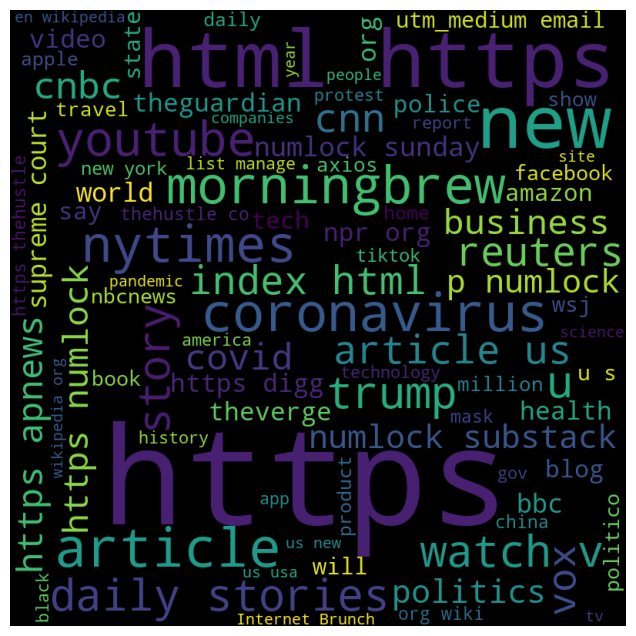

In [102]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(" ".join(df["url"].values))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [103]:
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [104]:
y = df["is_spam"]

X[:5]

array([[0.01990082, 0.01990082, 0.01990082, ..., 0.        , 0.        ,
        0.        ],
       [0.05506998, 0.05506998, 0.05506998, ..., 0.        , 0.        ,
        0.        ],
       [0.02936713, 0.02936713, 0.02936713, ..., 0.        , 0.        ,
        0.        ],
       [0.02197529, 0.02197529, 0.02197529, ..., 0.        , 0.        ,
        0.        ],
       [0.02948421, 0.02948421, 0.02948421, ..., 0.        , 0.        ,
        0.        ]], shape=(5, 5000))

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

SVC

In [106]:
model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

MODEL PREDICTION

In [107]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [108]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

0.9578059071729957
[[431   4]
 [ 16  23]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       435
           1       0.85      0.59      0.70        39

    accuracy                           0.96       474
   macro avg       0.91      0.79      0.84       474
weighted avg       0.95      0.96      0.95       474

ROC AUC: 0.7902740937223697


MODEL SAVE

In [109]:
from pickle import dump

dump(vectorizer, open("../models/vectorizer_tfidf_42.pkl", "wb"))
dump(model, open("../models/svm_classifier_linear_42.sav", "wb"))